# The Sparks Foundation

## Data Science and Business Analytics Internship

## Task-1 : Prediction using Supervised ML 

### Author : NEENU K B

### Data Set : http://bit.ly/w-data¶

This is a simple linear regression task as it involves just two variables.In this task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Import Libraries :

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Reading Data from csv file

In [2]:
path=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(path)
print("The Imported Data set :")
data.head(10)

The Imported Data set :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

In [4]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


###  Input Data Visualization

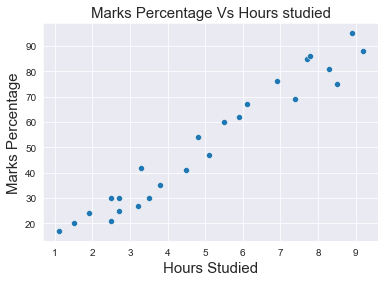

In [8]:
sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'],y= data['Scores'])
plt.title('Marks Percentage Vs Hours studied',size=15)
plt.ylabel('Marks Percentage',size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'.we can assume a positive linear relation between the number of hours studied and percentage of score.

In [9]:
# Checking the Correlation Between Hours and Study
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


###  Data Preparation

In [17]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [18]:
# Spliting the Data in four variables
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [23]:
# Fitting the Data into the model
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [24]:

print(regression.score(x_train,y_train))

0.9515510725211552


### Plotting the Line of regression

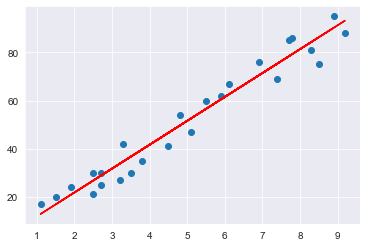

In [28]:
line= regression.coef_* x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.show()


In [31]:
# Testing data
print(X_test)
# Predicting values
y_pred=regression.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparsion between Actual and predicted Values


In [30]:
predicted_per=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
predicted_per

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if the student studies for 9.25hrs/day?


In [35]:
given_hours=9.25
prediction_for_hour= regression.predict([[given_hours]])
print(f'Predicted score for a student studied for {given_hours} is  {prediction_for_hour}')

Predicted score for a student studied for 9.25 is  [93.69173249]


In [37]:
#Lets try for 4.50
given_hours=4.50
prediction_for_hour= regression.predict([[given_hours]])
print(f'Predicted score for a student studied for {given_hours} is  {prediction_for_hour}')

Predicted score for a student studied for 4.5 is  [46.6161142]


### model validation

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Conclusion :   The predicted score for a student who studied for 9.25 hrs/day is 93.69173249